In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("drug.csv")  # Taking dataset
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


#### Data Preprocessing

In [3]:
# Finding null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [5]:
df.shape # Checking number of rows and columns

(200, 6)

In [6]:
df.isna().sum() #Checking for NaN values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
# Checking for unique values
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

So there are 4 categorical variables that is Sex, BP, Cholestrol & Drug
And; 2 numerical variable

### Univariate Analysis

In [9]:
# Creating a variable that holds the numeric variable and storing it as a list 

numerical_cols = df.select_dtypes(include = np.number).columns.to_list()
numerical_cols

['Age', 'Na_to_K']

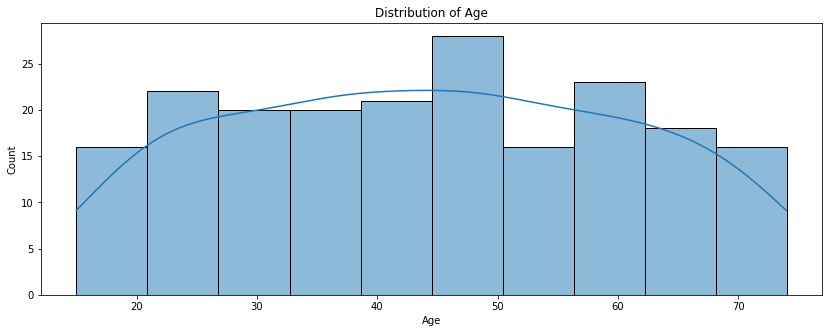

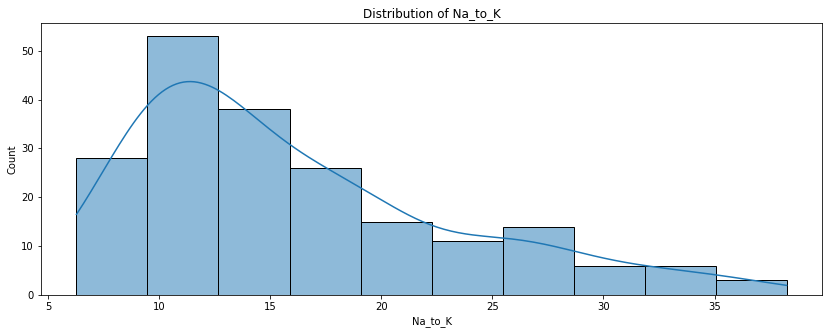

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(14,5))
    sns.histplot(data=df,x=col,bins=10,kde=True)
    plt.title(f"Distribution of {col}")

We see that Na_to_K is right skewed, so performing log tranformation to look like normal distribution

In [11]:
df['Na_to_K'] = np.log(df['Na_to_K'])

Text(0.5, 1.0, 'Distribution of Na_to_K')

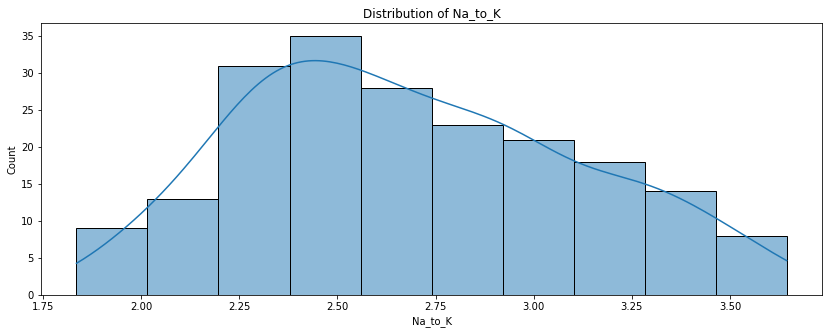

In [12]:
plt.figure(figsize=(14,5))
sns.histplot(data=df,x=df['Na_to_K'],bins=10,kde=True)
plt.title(f"Distribution of Na_to_K")

<AxesSubplot:xlabel='Drug', ylabel='Count'>

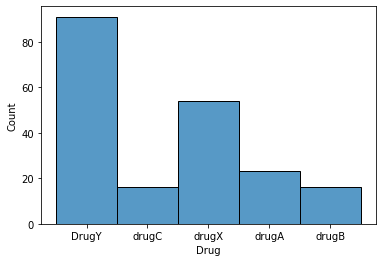

In [13]:
sns.histplot(data=df,x=df['Drug'])

#### There is an imbalance in the target labels i.e.; Drug Y is abundantly present. Hence to compensate this and ignore the baising of the result, I will be using class weights to balance this situation by putting weights= "uniform" during knn classification <a href= '#s0'>here</a>.

In [14]:
# Categorical variables

categorical_cols=df.select_dtypes(include=object).columns.to_list()
categorical_cols

['Sex', 'BP', 'Cholesterol', 'Drug']

In [15]:
# Encoding Categorical Variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for n in categorical_cols:
    df[n] = le.fit_transform(df[n])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,3.232976,0
1,47,1,1,0,2.572078,3
2,47,1,1,0,2.313921,3
3,28,0,2,0,2.053867,4
4,61,0,1,0,2.892758,0


In [16]:
# Distribution of dependent and independent variable

x = df.iloc[:,:5]
y = df.iloc[:,-1]
print(x.head(),"\n")
print(y.head())

   Age  Sex  BP  Cholesterol   Na_to_K
0   23    0   0            0  3.232976
1   47    1   1            0  2.572078
2   47    1   1            0  2.313921
3   28    0   2            0  2.053867
4   61    0   1            0  2.892758 

0    0
1    3
2    3
3    4
4    0
Name: Drug, dtype: int64


In [17]:
# Splitting into train and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 0) #Splitting test size to 25% as default value
x_train.shape,y_train.shape,x_test.shape,y_test.shape # Checking the size of each test and train set

((150, 5), (150,), (50, 5), (50,))

In [18]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier



# Using Euclidean distance
# Using weights to ignore biasing of target variable
k = KNeighborsClassifier(n_neighbors = 5, metric= "minkowski", p = 2, weights= "uniform") 

#### Implementing cross validation to train model on multiple train-test splits<a id ='s0'></a>

In [20]:
from sklearn.model_selection import cross_val_score

result=cross_val_score(k,x_train,y_train,cv=10)
print(result)
print("Average Result", result.mean())

[0.86666667 0.93333333 0.73333333 0.93333333 0.73333333 0.66666667
 0.66666667 1.         0.86666667 0.86666667]
Average Result 0.8266666666666668


As seen from the above result after applying K fold cross validation the lower accuracy of the model is 66.67% and the highest accuracy is 100, which can also be seen from the graph <a href= '#s1'>here</a>

In [21]:
k.fit(x_train,y_train) # Training models

KNeighborsClassifier()

In [22]:
# Making prediction 

y_pred = k.predict(x_test) # It will do the prediction of new data and give us the O/P

Accuracy score: 0.8
Precision Score :  0.7779411764705882
Recall Score :  0.7838333333333333


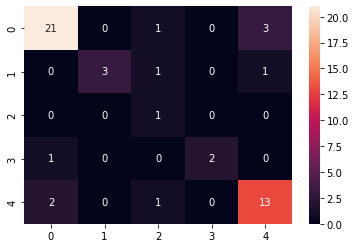

In [23]:
# Creating Confusion metrics

from sklearn import metrics


cm = metrics.confusion_matrix(y_test, y_pred) #To compare predicted result with the actual result
sns.heatmap(cm, annot=True)
accuracy = metrics.accuracy_score(y_test, y_pred) # Checking accuracy of a model
print("Accuracy score:", accuracy)
print("Precision Score : ", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall Score : ",metrics.recall_score(y_test, y_pred, average='macro'))

We get an accuracy of 80%.

#### Now checking the performance of testing and training dataset for different n_neighbors values. I will choose 1-40.

In [24]:
training_accuracy = []
testing_accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train, y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))
    
    
# accuracy(y_test, y_pred)

#### Graph fro 1-40 knn values <a id ='s1'></a>

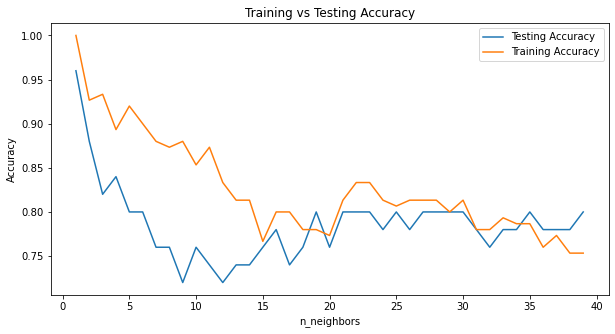

In [25]:
# Plotting test, train accuracy with n_neighbors 


plt.figure(figsize=(10,5))
plt.plot(range(1,40), testing_accuracy, label = "Testing Accuracy")
plt.plot(range(1,40), training_accuracy, label = "Training Accuracy")
plt.title('Training vs Testing Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()